In [207]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [208]:
class MMPP:
    def __init__(self, Q, L):
        self.Q = Q
        self.L = L
        self.list_of_states = range(len(Q))
    
    def __start_state(self):
        QT = self.Q.copy().T
        QT[-1,:] = 1
        F = np.zeros(QT.shape[0])
        F[-1] = 1
        p = np.linalg.solve(QT, F)
        h = 0
        xi = np.random.uniform(0, 1)
        for k, i in enumerate(p):
            if xi > h + i:return k
            else: h += p

    def __next_state(self, current_state, current_time):
        rates = self.Q[current_state].copy()
        v = [np.random.exponential(1/abs(i)) for i in rates]
        v[current_state] = 0
        next_state = np.argsort(v)[1] # следующее состояние
        T = v[np.argsort(v)[1]] + current_time # время окончания следующего состояния
        return next_state, v[np.argsort(v)[1]] + current_time
    
    def modeling(self, S, start_state):
        current_state = self.__start_state()     # Текущее состояние
        list_of_states = [current_state]    # Список сотояний
        times = [0]     # Время переходов состояний
        events = []     # Моменты времени наступления событий
        state_of_event = []     # Состояния в момент времни настпления событий (ожно вычислить после моделирования, но в процессе проще)
        current_time = 0    # Время последнего состояния 
        s = 0            # Количество событий
        time_of_next_state = np.random.exponential(1/-self.Q[current_state, current_state])
        
        while S > s:
            time_to_next_event = np.random.exponential(1/self.L[current_state]) # Интервал времени до следующего события
            while current_time + time_to_next_event <= time_of_next_state and S > s:
                current_time += time_to_next_event
                events.append(current_time)
                state_of_event.append(current_state)
                s += 1
                time_to_next_event = np.random.exponential(1/self.L[current_state])
                
            current_time = time_of_next_state
            times.append(time_of_next_state)
            current_state, time_of_next_state = self.__next_state(current_state=current_state, current_time = current_time)
            list_of_states.append(current_state)
            
            
        return list_of_states, times, events, state_of_event

In [209]:
def gen_ML_Q_L(n = 4, l = 1000):
    Q = np.zeros((n, n))
    L = np.zeros((n))
    L[0] = l
    q0 = l * np.random.uniform()       # λ >> q0

    #вектор v из n-1, такой, что v[i]>0 и sum(v) = 1
    v = np.random.dirichlet(np.ones(n-1), size=1)[0] 

    for i in range(1, n): 
        Q[0,i] = q0 * v[i-1]
        Q[i, 0] = (q0* np.random.uniform())/(10**i) # q0 >> q1 >> q2 >>··· >> qN 

    for i in range(n):
        Q[i,i] = -sum(Q[i,:])
    return Q, L


In [210]:
'''
# Пример из статьи

Q = np.array([
    [-100, 99, 0.99, 0.01],
    [50, -50, 0, 0],
    [0.2, 0, -0.2, 0],
    [0.001, 0, 0, -0.001]
])
L = np.array([100, 0, 0, 0])

'''


'\n# Пример из статьи\n\nQ = np.array([\n    [-100, 99, 0.99, 0.01],\n    [50, -50, 0, 0],\n    [0.2, 0, -0.2, 0],\n    [0.001, 0, 0, -0.001]\n])\nL = np.array([100, 0, 0, 0])\n\n'

In [ ]:
Q, L = gen_ML_Q_L(6, 1000)
#Q, L

In [212]:
S = 5000
mmpp_new = MMPP(Q, L)
states, times, events, state_of_event = mmpp_new.modeling(S=S, start_state= 0)
states[-1] = states[-2]

/var/folders/64/59qks5hx0q7fjs2ym7k7gr080000gn/T/ipykernel_82542/3362861684.py:38: RuntimeWarning:

divide by zero encountered in scalar divide

/var/folders/64/59qks5hx0q7fjs2ym7k7gr080000gn/T/ipykernel_82542/3362861684.py:21: RuntimeWarning:

divide by zero encountered in scalar divide



In [213]:
fig = px.histogram(np.array(events), nbins=500, histnorm='density')
fig.update_layout(xaxis_title='Event time', yaxis_title='Density', xaxis=dict(range=[0, max(events)]))
fig.show()

In [214]:
fig = px.histogram(np.array(events[:int(S/10)]), nbins=500, histnorm='density')
fig.update_layout(xaxis_title='Event time', yaxis_title='Density', xaxis=dict(range=[0, max(events[:int(S/10)])]))
fig.show()

In [215]:
fig = px.histogram(np.array(events[:int(S/100)]), nbins=400, histnorm='density')
fig.update_layout(xaxis_title='Event time', yaxis_title='Density', xaxis=dict(range=[0, max(events[:int(S/100)])]))
fig.show()

In [216]:
'''
print(len(states), states)
print(len(times), times)
print(len(events), events)
print(len(state_of_event), state_of_event)
'''

'\nprint(len(states), states)\nprint(len(times), times)\nprint(len(events), events)\nprint(len(state_of_event), state_of_event)\n'

Q - матрица инфинитизимальных характеристик

Λ - Вектор интенсивностей

V - Вспомогательный вектор (Для выполнения функции np.random.choice(self.list_of_states, p=rates/-self.Q[current_state, current_state]))

S - Максимальное количество событий

K - Количество состояний

π - Стационарное распределение вероятностей нахождения некотором состоянии

k - Текущее состояние (current_state)

T - Текущее время (current_time)

t - Ветор моментов настпуления событий (events)

u - Вспомогательная переменная для цикла в котором, находится начальное состояние

ξ - Случайная равномерно распределенная величина умножиная на стационарую верятность k-го состояния

η - Время наступления следующего события

ζ - Вспомогательная случайная величина для находения следующего состянии и интервала времени нахождения в нем

v - Вспомогательная переменная для цикла в котором, находится следующее состояние и интервал времени нахождения в нем

s - Текущее количество событий

τ - Интервал времени до момента наступления следующего события (time_to_next_event)

![MMPP-Страница — 5.drawio-2.png](<attachment:MMPP-Страница — 5.drawio-2.png>)
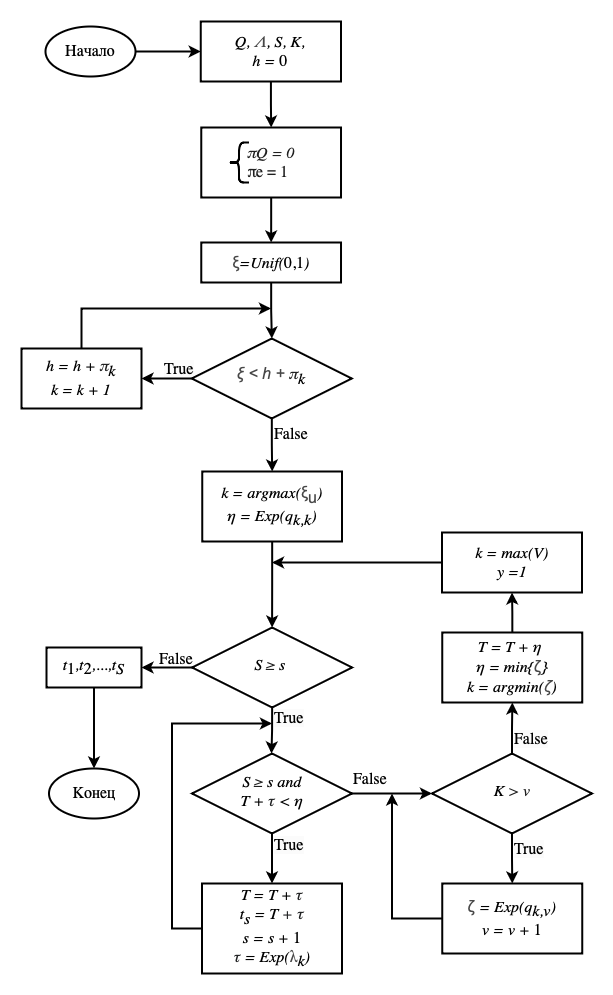